In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
objects =  tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = objects.load_data()

In [ ]:
training_labels[10:]

array([3, 5, 3, ..., 5, 6, 8], dtype=uint8)

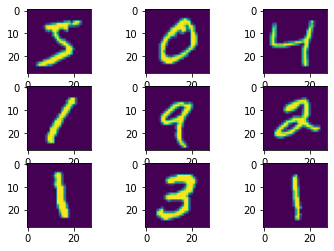

In [ ]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(training_images[i])

In [ ]:
print(training_images.shape)
print(training_images[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

In [ ]:
training_images  = training_images.reshape(-1, 28 * 28) / 255.0
test_images = test_images.reshape(-1, 28 * 28) / 255.0

In [ ]:


# Reserve 10,000 samples for validation
validation_images = training_images[-10000:]
validation_labels = training_labels[-10000:]
training_images = training_images[:-10000]
training_labels = training_labels[:-10000]

In [ ]:
print(training_images.shape , validation_images.shape)

(50000, 784) (10000, 784)


In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)), 
                                    tf.keras.layers.Dense(64, activation='relu'), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def createModel():
  model = tf.keras.models.Sequential([tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)), 
                                    tf.keras.layers.Dense(64, activation='relu'), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
  
  model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
history = model.fit(training_images, training_labels,batch_size=128, epochs=32 , validation_data=(validation_images, validation_labels))

Epoch 1/32
391/391 [==============================] - 2s 3ms/step - loss: 0.3612 - accuracy: 0.8980 - val_loss: 0.1647 - val_accuracy: 0.9531
Epoch 2/32
391/391 [==============================] - 1s 2ms/step - loss: 0.1443 - accuracy: 0.9578 - val_loss: 0.1143 - val_accuracy: 0.9679
Epoch 3/32
391/391 [==============================] - 1s 3ms/step - loss: 0.1005 - accuracy: 0.9700 - val_loss: 0.1005 - val_accuracy: 0.9699
Epoch 4/32
391/391 [==============================] - 1s 3ms/step - loss: 0.0769 - accuracy: 0.9766 - val_loss: 0.0900 - val_accuracy: 0.9733
Epoch 5/32
391/391 [==============================] - 1s 2ms/step - loss: 0.0606 - accuracy: 0.9817 - val_loss: 0.0866 - val_accuracy: 0.9750
Epoch 6/32
391/391 [==============================] - 1s 2ms/step - loss: 0.0491 - accuracy: 0.9855 - val_loss: 0.0949 - val_accuracy: 0.9739
Epoch 7/32
391/391 [==============================] - 1s 3ms/step - loss: 0.0401 - accuracy: 0.9879 - val_loss: 0.0878 - val_accuracy: 0.9747
Epoch 

In [ ]:
print(model.evaluate(test_images,test_labels))

313/313 [==============================] - 1s 2ms/step - loss: 0.1026 - accuracy: 0.9803
[0.1026308462023735, 0.9803000092506409]


In [ ]:
prediction=model.predict(test_images)
prediction_labels = [np.argmax(i) for i in prediction]

7


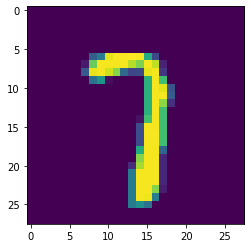

In [ ]:
n = 255
plt.imshow(test_images[n].reshape(28,28))
print(prediction_labels[n])

In [ ]:
cm = tf.math.confusion_matrix(labels=test_labels,predictions=prediction_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    1,    0,    1,    0,    4,    1,    3,    1],
       [   0, 1124,    4,    1,    0,    0,    2,    1,    3,    0],
       [   5,    2, 1010,    4,    1,    0,    2,    5,    3,    0],
       [   0,    0,    4,  992,    0,    1,    0,    5,    2,    6],
       [   0,    0,    2,    1,  965,    0,    3,    3,    1,    7],
       [   3,    0,    0,    9,    1,  866,    6,    0,    5,    2],
       [   4,    2,    0,    1,    2,    3,  943,    1,    1,    1],
       [   0,    4,    7,    1,    0,    0,    1, 1007,    1,    7],
       [   2,    1,    4,    7,    5,    4,    1,    2,  944,    4],
       [   2,    3,    0,    3,    7,    3,    2,    4,    2,  983]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

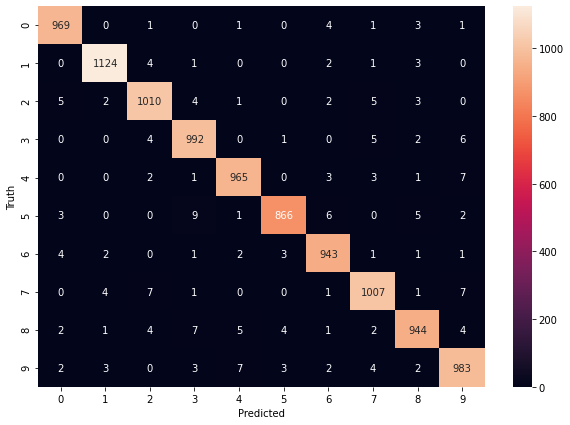

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(test_labels, prediction_labels))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
model.save("./drive/MyDrive/Colab Notebooks/MNIST/MNIST_model.h5")

In [ ]:
newModel = createModel()
loss, acc = newModel.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))


313/313 - 0s - loss: 2.3421 - accuracy: 0.1505
Restored model, accuracy: 15.05%


In [ ]:
newModel = tf.keras.models.load_model('./drive/MyDrive/Colab Notebooks/MNIST/MNIST_model.h5')
loss, acc = newModel.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

313/313 - 0s - loss: 0.1026 - accuracy: 0.9803
Restored model, accuracy: 98.03%


In [ ]:
!apt-get install swig cmake libopenmpi-dev zlib1g-dev xvfb x11-utils ghostscript ffmpeg -qq #remove -qq for full output
!pip install pyvirtualdisplay ghostscript

Selecting previously unselected package fonts-droid-fallback.
(Reading database ... 160815 files and directories currently installed.)
Preparing to unpack .../00-fonts-droid-fallback_1%3a6.0.1r16-1.1_all.deb ...
Unpacking fonts-droid-fallback (1:6.0.1r16-1.1) ...
Selecting previously unselected package libxxf86dga1:amd64.
Preparing to unpack .../01-libxxf86dga1_2%3a1.1.4-1_amd64.deb ...
Unpacking libxxf86dga1:amd64 (2:1.1.4-1) ...
Selecting previously unselected package poppler-data.
Preparing to unpack .../02-poppler-data_0.4.8-2_all.deb ...
Unpacking poppler-data (0.4.8-2) ...
Selecting previously unselected package fonts-noto-mono.
Preparing to unpack .../03-fonts-noto-mono_20171026-2_all.deb ...
Unpacking fonts-noto-mono (20171026-2) ...
Selecting previously unselected package libcupsimage2:amd64.
Preparing to unpack .../04-libcupsimage2_2.2.7-1ubuntu2.8_amd64.deb ...
Unpacking libcupsimage2:amd64 (2.2.7-1ubuntu2.8) ...
Selecting previously unselected package libijs-0.35:amd64.
Pre

In [ ]:
import os
os.system("Xvfb :1 -screen 0 1024x768x24 &")
os.environ['DISPLAY'] = ':1'
from tkinter import *
from google.colab.patches import cv2_imshow
from google.colab import output
from PIL import Image

In [ ]:
import tkinter as tk
import numpy as np
import cv2

#pip install pillow
from PIL import ImageTk,Image,ImageDraw

import tensorflow as tf

model = tf.keras.models.load_model('./drive/MyDrive/Colab Notebooks/MNIST/MNIST_model.h5')

def event_function(event):
    
    x=event.x
    y=event.y
    
    x1=x-30
    y1=y-30
    
    x2=x+30
    y2=y+30

    canvas.create_oval((x1,y1,x2,y2),fill='black')
    img_draw.ellipse((x1,y1,x2,y2),fill='white')

def save():
    
    global count
    
    img_array=np.array(img)
    img_array=cv2.resize(img_array,(28,28))
    
    cv2.imwrite(str(count)+'.jpg',img_array)
    count=count+1

def clear():
    
    global img,img_draw
    
    canvas.delete('all')
    img=Image.new('RGB',(500,500),(0,0,0))
    img_draw=ImageDraw.Draw(img)    
    
    label_status.config(text='PREDICTED DIGIT: NONE')

def predict():
    
    img_array=np.array(img)
    img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2GRAY)
    img_array=cv2.resize(img_array,(28,28))
    
    img_array=img_array/255.0
    img_array=img_array.reshape(1,28,28)
    result=model.predict(img_array)
    label=np.argmax(result,axis=1)
    
    label_status.config(text='PREDICTED DIGIT:'+str(label))
    
count=0
    
win=tk.Tk()

canvas=tk.Canvas(win,width=500,height=500,bg='white')
canvas.grid(row=0,column=0,columnspan=4)

button_save=tk.Button(win,text='SAVE',bg='green',fg='white',font='Helvetica 20 bold',command=save)
button_save.grid(row=1,column=0)

button_predict=tk.Button(win,text='PREDICT',bg='blue',fg='white',font='Helvetica 20 bold',command=predict)
button_predict.grid(row=1,column=1)

button_clear=tk.Button(win,text='CLEAR',bg='yellow',fg='white',font='Helvetica 20 bold',command=clear)
button_clear.grid(row=1,column=2)

button_exit=tk.Button(win,text='EXIT',bg='red',fg='white',font='Helvetica 20 bold',command=win.destroy)
button_exit.grid(row=1,column=3)

label_status=tk.Label(win,text='PREDICTED DIGIT: NONE',bg='white',font='Helvetica 24 bold')
label_status.grid(row=2,column=0,columnspan=4)

canvas.bind('<B1-Motion>',event_function)
img=Image.new('RGB',(500,500),(0,0,0))
img_draw=ImageDraw.Draw(img)

win.mainloop()